In [2]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     -------------------------------------- 38.6/38.6 MB 104.3 kB/s eta 0:00:00


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%maplotlib inline

UsageError: Line magic function `%maplotlib` not found.


In [2]:
# read data
df = pd.read_csv("UK_Traffic_Accidents_2015.csv",low_memory= False)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [6]:
df.shape

(140056, 32)

In [7]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [3]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               140056 non-null  object 
 1   Location_Easting_OSGR                        140029 non-null  float64
 2   Location_Northing_OSGR                       140029 non-null  float64
 3   Longitude                                    140029 non-null  float64
 4   Latitude                                     140029 non-null  float64
 5   Police_Force                                 140056 non-null  int64  
 6   Accident_Severity                            140056 non-null  int64  
 7   Number_of_Vehicles                           140056 non-null  int64  
 8   Number_of_Casualties                         140056 non-null  int64  
 9   Date                                         140056 non-nul

### Outlines
1.Categorical features
2.Numerical features
3 Relationship between features

In [5]:
# CATEGORICAL FEATURES
cat_features = [f for f in df.columns if df[f].dtype == "object"]
cat_features

['Accident_Index',
 'Date',
 'Time',
 'Local_Authority_(Highway)',
 'LSOA_of_Accident_Location']

In [15]:
for f in cat_features:
    print(f,":",len(df[f].unique()))

Accident_Index : 140056
Date : 365
Time : 1440
Local_Authority_(Highway) : 207
LSOA_of_Accident_Location : 28738


In [6]:
for f in cat_features:
    if f != "Accident_Index":
        print(f,":",df[f].unique())

Date : ['12/01/2015' '13/01/2015' '09/01/2015' '15/01/2015' '18/01/2015'
 '16/01/2015' '20/01/2015' '23/01/2015' '22/01/2015' '21/01/2015'
 '25/01/2015' '24/01/2015' '28/01/2015' '30/01/2015' '29/01/2015'
 '01/02/2015' '31/01/2015' '03/02/2015' '04/02/2015' '07/02/2015'
 '08/02/2015' '05/02/2015' '06/02/2015' '09/02/2015' '10/02/2015'
 '13/02/2015' '14/02/2015' '16/02/2015' '17/02/2015' '11/02/2015'
 '19/02/2015' '20/02/2015' '21/02/2015' '22/02/2015' '23/02/2015'
 '25/02/2015' '26/02/2015' '01/03/2015' '28/02/2015' '02/03/2015'
 '03/03/2015' '06/03/2015' '04/03/2015' '10/03/2015' '11/03/2015'
 '12/03/2015' '13/03/2015' '15/03/2015' '16/03/2015' '17/03/2015'
 '18/03/2015' '05/03/2015' '19/03/2015' '20/03/2015' '21/03/2015'
 '22/03/2015' '23/03/2015' '14/03/2015' '24/03/2015' '25/03/2015'
 '29/03/2015' '27/03/2015' '27/05/2015' '28/03/2015' '31/03/2015'
 '02/04/2015' '10/04/2015' '12/04/2015' '11/04/2015' '09/04/2015'
 '13/04/2015' '14/04/2015' '07/01/2015' '08/01/2015' '05/01/2015'
 '0

In [19]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [9]:
# Drop nan values
df = df.dropna()

In [10]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [11]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [12]:
# include month that the acciden must have occured
def get_month(col):
    return col.split('/')[1]
    
df["Month"] = df["Date"].apply(lambda x:get_month(x))
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_9960\78225144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].apply(lambda x:get_month(x))


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,01


In [13]:
df["Month"] = df["Month"].astype("int")

C:\Users\user\AppData\Local\Temp\ipykernel_9960\1199133173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Month"].astype("int")


In [14]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,1
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,1
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,1
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,1


C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


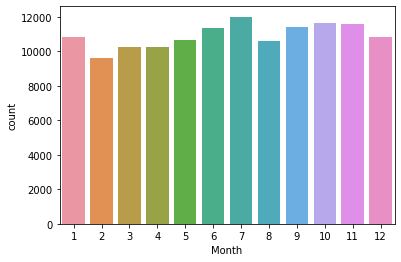

Mean:10928.67   Standard Deviation:701.77


In [18]:
sns.countplot(df["Month"])
plt.show()
print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(df.Month.value_counts().mean(), 
                                                      df.Month.value_counts().std()))



commenr:Highest number of accidents occur in july and the lowest number of accident occur in febraury,the number of accidents towards the end of the year are king of higher

### Lets get to know the number of accident in the hours of the day


In [24]:
df["Time"].head()

0    18:45
1    07:50
2    18:08
3    07:40
4    07:30
Name: Time, dtype: object

In [25]:
def get_hour(col):
    return col.split(':')[0]
    
df["Hour"] = df["Time"].apply(lambda x:get_hour(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,4,1,1,0,0,1,1,E01002825,1,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,1,1,1,0,0,1,1,E01002820,1,07
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,4,2,2,0,0,1,1,E01002833,1,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,1,1,2,0,0,1,2,E01002874,1,07
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,1,2,2,0,0,1,2,E01002814,1,07


In [26]:
df["Hour"] = df["Hour"].astype(int)
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,4,1,1,0,0,1,1,E01002825,1,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,1,1,1,0,0,1,1,E01002820,1,7
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,4,2,2,0,0,1,1,E01002833,1,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,1,1,2,0,0,1,2,E01002874,1,7
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,1,2,2,0,0,1,2,E01002814,1,7


In [27]:
#chage format of time
def change_hour_format(hr):
    if hr <= 12:
        return str(hr)+"am"
    else:
        return str(hr - 12) + "pm"
df["Hour"] = df["Hour"].apply(lambda x:change_hour_format(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,4,1,1,0,0,1,1,E01002825,1,6pm
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,1,1,1,0,0,1,1,E01002820,1,7am
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,4,2,2,0,0,1,1,E01002833,1,6pm
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,1,1,2,0,0,1,2,E01002874,1,7am
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,1,2,2,0,0,1,2,E01002814,1,7am


In [28]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Month', 'Hour'],
      dtype='object')

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


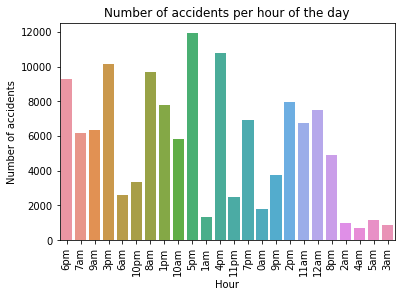

In [32]:
#visualize number of casualties in each hour
sns.countplot(df["Hour"])
plt.xticks(rotation = 90)
plt.ylabel("Number of accidents")
plt.title("Number of accidents per hour of the day")
plt.show()

comment : Most accident cases occur around 5pm and and 4 pm

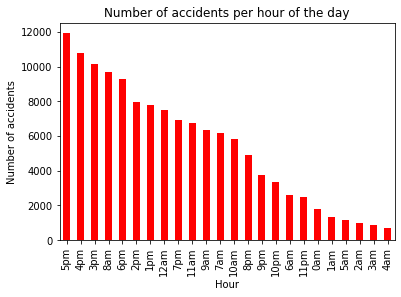

In [38]:
# display top hours with highest case of accidemts
plt.xticks(rotation = 90)
plt.ylabel("Number of accidents")
plt.title("Number of accidents per hour of the day")
df.groupby("Hour")["Hour"].count().sort_values(ascending = False).plot.bar(color = "red")
plt.show()

comment:Most accidents occur around 5pm,4pm,3pm,8pm.....as show on the diagram,This might because there might be a lock of traffic at this time or more people tend to move out around this time but there are obvioulsy a lot of casualities aroung 8am,this might because a lot of people tend to go and go their respective work places which in turn returns into road traffic

#### Since there are lot accidents in july compared to every other month,lets get to know which hour this accoidents must have occured

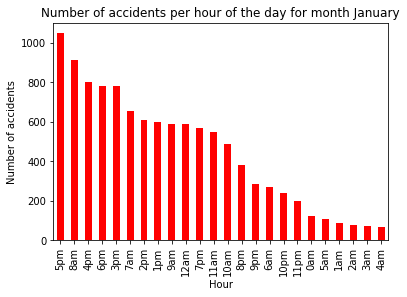

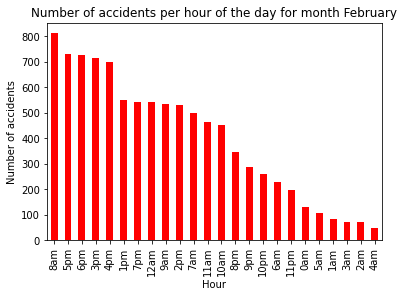

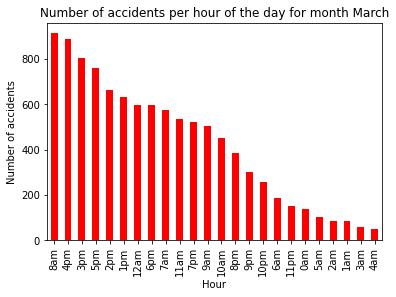

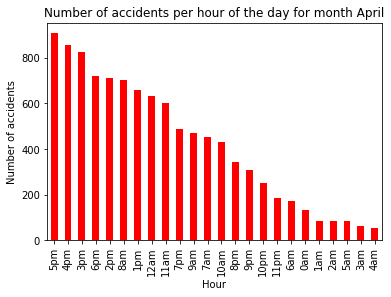

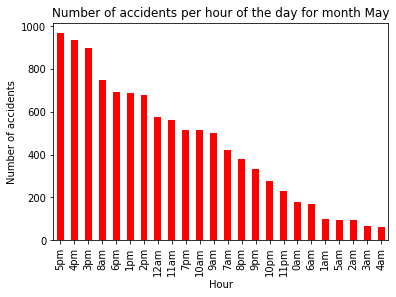

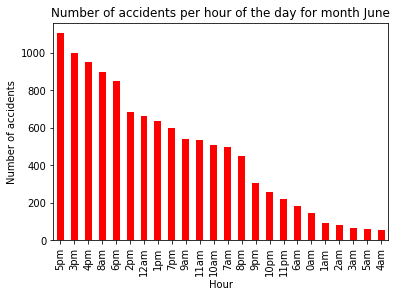

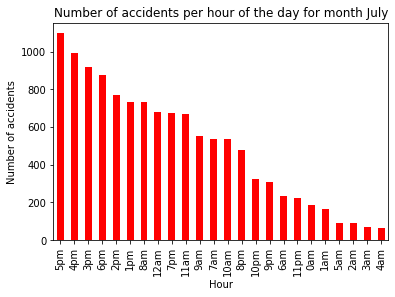

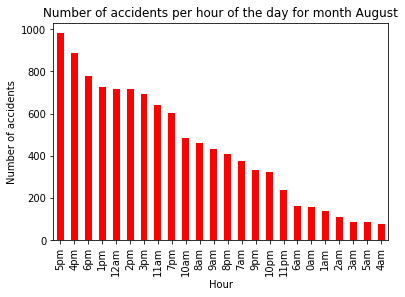

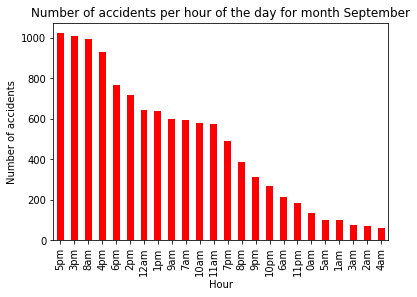

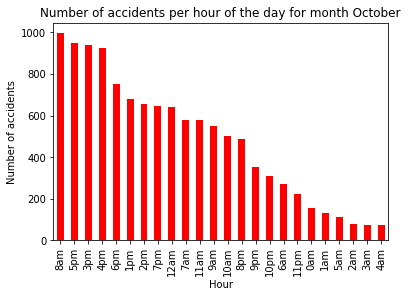

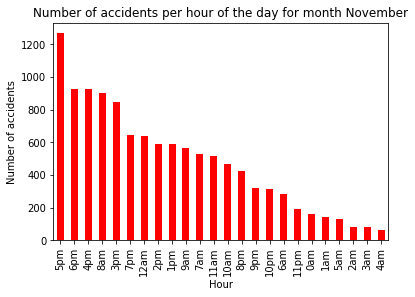

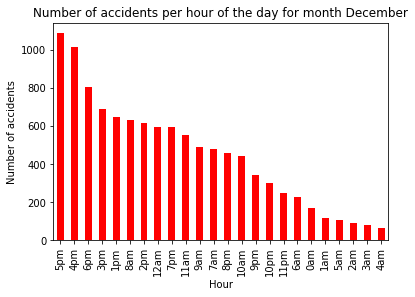

In [51]:
months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
for i in range(1,13):
# display top hours with highest case of accidemts
        data = df.copy()
        data = data.loc[data["Month"] == i]
        plt.xticks(rotation = 90)
        plt.ylabel("Number of accidents")
        plt.title("Number of accidents per hour of the day for month " + str(months[i]))
        data.groupby("Hour")["Hour"].count().sort_values(ascending = False).plot.bar(color = "red")
        plt.show()


comment:most in accidents in feb,March and October occur around 8am

In [52]:
df["Local_Authority_(Highway)"].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000012', 'E09000028', 'E09000019', 'E09000007', 'E09000005',
       'E09000014', 'E09000003', 'E09000009', 'E09000018', 'E09000031',
       'EHEATHROW', 'E09000017', 'E09000026', 'E09000025', 'E09000002',
       'E09000016', 'E09000022', 'E09000006', 'E09000008', 'E09000032',
       'E09000023', 'E09000011', 'E09000004', 'E09000015', 'E09000010',
       'E09000021', 'E09000029', 'E09000024', 'E09000027', 'E10000006',
       'E06000008', 'E10000017', 'E06000009', 'E08000012', 'E08000015',
       'E08000014', 'E08000013', 'E08000011', 'E08000003', 'E08000006',
       'E08000008', 'E08000007', 'E08000001', 'E08000010', 'E08000009',
       'E08000002', 'E08000005', 'E08000004', 'E06000007', 'E06000050',
       'E06000049', 'E06000006', 'E06000048', 'E08000021', 'E08000020',
       'E08000024', 'E08000023', 'E08000022', 'E06000047', 'E06000005',
       'E10000023', 'E06000014', 'E08000035', 'E08000034', 'E080

In [53]:
df["LSOA_of_Accident_Location"].unique()

array(['E01002825', 'E01002820', 'E01002833', ..., 'W01000478',
       'W01000467', 'W01000432'], dtype=object)